## R을 이용한 m텍스트 마이닝
## 백영민 / 한울아카데미

########################################
#제 3부 텍스트 데이터 분석 및 결과제시##
#03 감정분석############################
########################################

In [ ]:
#감정어휘 사전을 활용한 텍스트 감정분석 
library(tidytext)
library(tidyr)

#AFINN 감정어휘 사전 호출
get_sentiments("afinn")

     word               score        
 Length:2476        Min.   :-5.0000  
 Class :character   1st Qu.:-2.0000  
 Mode  :character   Median :-2.0000  
                    Mean   :-0.5889  
                    3rd Qu.: 2.0000  
                    Max.   : 5.0000  

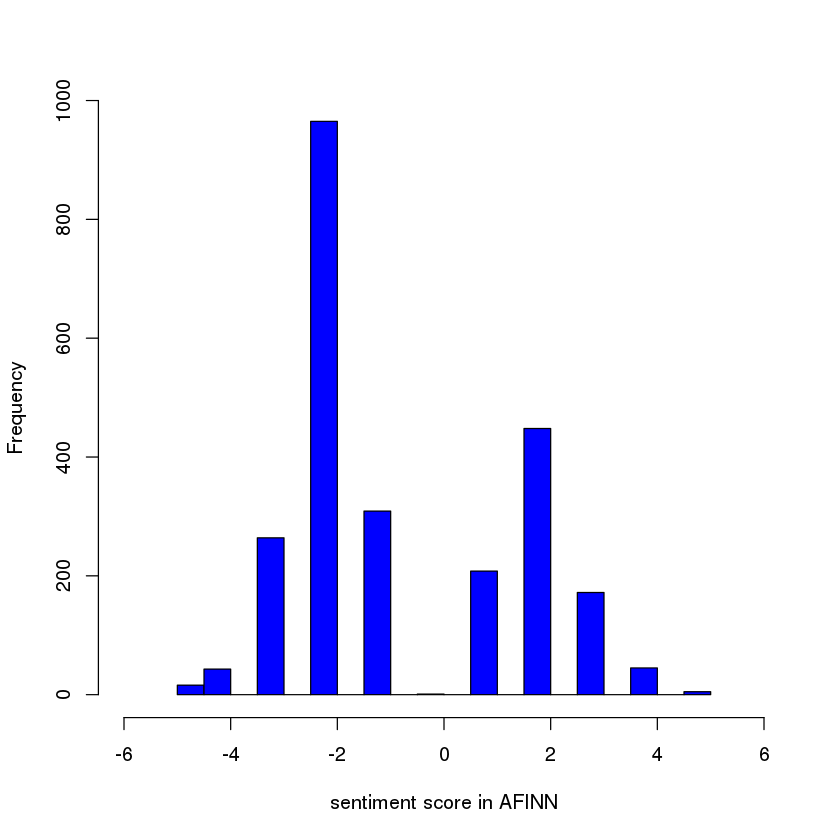

In [2]:
#감정어휘 사전은 별도로 저장하여 사용도 가능함
AFINN <- data.frame(get_sentiments("afinn"))
summary(AFINN)
hist(AFINN$score,breaks=20,xlim=c(-6,6),col='blue',
     xlab='sentiment score in AFINN',
     main='')

In [3]:
#빙류의 opinion lexicon 사전 호출
get_sentiments("bing")

#EmoLex 사전 호출
get_sentiments("nrc")

#opinion lexicon, EmoLex 사전 저장 후 기초통계 분석
oplex <- data.frame(get_sentiments("bing"))
table(oplex$sentiment)

emolex <- data.frame(get_sentiments("nrc"))
table(emolex$sentiment)
emolex$word[emolex$sentiment=='anger']

word,sentiment
<chr>,<chr>
2-faced,negative
2-faces,negative
a+,positive
abnormal,negative
abolish,negative
abominable,negative
abominably,negative
abominate,negative
abomination,negative


word,sentiment
<chr>,<chr>
abacus,trust
abandon,fear
abandon,negative
abandon,sadness
abandoned,anger
abandoned,fear
abandoned,negative
abandoned,sadness
abandonment,anger



negative positive 
    4782     2006 


       anger anticipation      disgust         fear          joy     negative 
        1247          839         1058         1476          689         3324 
    positive      sadness     surprise        trust 
        2312         1191          534         1231 

[1] "abandoned"        "abandonment"      "abhor"           
   [4] "abhorrent"        "abolish"          "abomination"     
   [7] "abuse"            "accursed"         "accusation"      
  [10] "accused"          "accuser"          "accusing"        
  [13] "actionable"       "adder"            "adversary"       
  [16] "adverse"          "adversity"        "advocacy"        
  [19] "affront"          "aftermath"        "aggravated"      
  [22] "aggravating"      "aggravation"      "aggression"      
  [25] "aggressive"       "aggressor"        "agitated"        
  [28] "agitation"        "agony"            "alcoholism"      
  [31] "alienate"         "alienation"       "allegation"      
  [34] "altercation"      "ambush"           "anarchism"       
  [37] "anarchist"        "anarchy"          "anathema"        
  [40] "anger"            "angry"            "anguish"         
  [43] "animosity"        "animus"           "annihilate"      
  [46] "annihilated"      "annihilation"     "annoy"           
  [49] "annoyance"        "annoying"         "antagonism"      
  [52] "antagonist"       "antagonistic"     "antichrist"      
  [55] "antipathy"        "antisocial"       "antithesis"      
  [58] "anxiety"          "argue"            "argument"        
  [61] "argumentation"    "arguments"        "armament"        
  [64] "armed"            "arraignment"      "arrogant"        
  [67] "arson"            "assail"           "assailant"       
  [70] "assassin"         "assassinate"      "assassination"   
  [73] "assault"          "asshole"          "atrocious"       
  [76] "atrocity"         "attack"           "attacking"       
  [79] "attorney"         "avarice"          "avenger"         
  [82] "averse"           "aversion"         "awful"           
  [85] "backbone"         "bad"              "badger"          
  [88] "badness"          "bane"             "bang"            
  [91] "banger"           "banish"           "banished"        
  [94] "banishment"       "bankruptcy"       "banshee"         
  [97] "barb"             "barbaric"         "bark"            
 [100] "barrier"          "bastion"          "battalion"       
 [103] "batter"           "battery"          "battle"          
 [106] "battled"          "bayonet"          "bear"            
 [109] "bearish"          "beast"            "beating"         
 [112] "bee"              "belittle"         "belligerent"     
 [115] "bellows"          "belt"             "berserk"         
 [118] "betray"           "betrayal"         "bias"            
 [121] "bickering"        "bigot"            "bigoted"         
 [124] "bile"             "birch"            "birthplace"      
 [127] "bitch"            "bitterly"         "bitterness"      
 [130] "blackmail"        "blame"            "blasphemous"     
 [133] "blasphemy"        "blast"            "blatant"         
 [136] "blaze"            "blemish"          "blockade"        
 [139] "bloodshed"        "bloodthirsty"     "bloody"          
 [142] "bogus"            "boisterous"       "bomb"            
 [145] "bombard"          "bombardment"      "bothering"       
 [148] "bout"             "boxing"           "brawl"           
 [151] "brazen"           "brimstone"        "broil"           
 [154] "broken"           "brunt"            "brutal"          
 [157] "brutality"        "brute"            "buffet"          
 [160] "bugaboo"          "bully"            "bummer"          
 [163] "burial"           "burke"            "busted"          
 [166] "butcher"          "cacophony"        "cad"             
 [169] "callous"          "campaigning"      "cancer"          
 [172] "cane"             "canker"           "cannon"          
 [175] "carelessness"     "carnage"          "cash"            
 [178] "casualty"         "catastrophe"      "caution"         
 [181] "celebrity"        "censor"           "chaff"           
 [184] "challenge"        "chant"            "chaos"           
 [187] "chaotic"          "cheat"  

In [5]:
# 텍스트 데이터 호출
library('tm')
library('stringr')
library('dplyr')
my.text.location <- "ymbaek_papers"
mypaper  <- VCorpus(DirSource(my.text.location),
                    readerControl = list(language="en"))
mytxt <- c(rep(NA),24)
for (i in 1:24) {
  mytxt[i] <- as.character(mypaper[[i]][1])
}

In [6]:
#tidytext 형태의 데이터 구성 
my.df.text <- data_frame(paper.id=1:24, doc=mytxt)
#총 24개의 가로줄과 2개의 세로줄로 구성된 행렬
my.df.text

Warning message:
“`data_frame()` is deprecated, use `tibble()`.
This warning is displayed once per session.”

paper.id,doc
<int>,<chr>
1,"Does deliberative setting, online versus face-to-face, influence citizens' experiences? Are certain factors differently influential in one setting than in the other? We draw on a nationally representative survey and identify citizens who participated in both online and face-to-face settings (n = 82). We use structural equation modeling to first assess the effects that deliberation format has on the interrelationship between such crucial factors as motivations to deliberate, perceived diversity, elicited emotions, enhanced understanding, and goal evaluation. We later employ network analysis to ask which factor or which cluster of factors is more central to an overall experience in which format. Relying on citizens who participated in both settings and using within-subject analyses, we assure that the previously unnoted findings are attributable to the format per se rather than to individual characteristics. We discuss the theoretical, practical and methodological implications."
2,"The debate on late night comedy has been inconclusive, with some scholars arguing that this genre increases political knowledge, and others seeing late night comedy as harmful to effective citizenry. We add to the debate and to the research on media effects more generally, by proposing a model that measures political knowledge. The model utilizes item response theory (IRT) to account for individual characteristics, knowledge item difficulty, and response format that influences the likelihood of providing a correct response. Drawing on the 2004 National Annenberg Election Study, we employ this model to test knowledge gain from late night comedy. Using a meta-analysis across 35 political knowledge items, we show that late night comedy increases knowledge, but primarily on easy political items that have fewer correct response options, and mainly among the inattentive citizens. We discuss theoretical implications and provide practical suggestions for scholarship on media effects."
3,"We draw on a nationally representative sample of American adults who reported having participated in face-to-face deliberation (N = 756). We use structural equation modeling to first ask whether perceived political diversity differently influences follow-up engagement in various civic or political activities among strong, weak, and moderate ideologues. We also examine the processes - cognitive and affective - that lead from perceived diversity to follow-up engagement, and assess whether these processes depend on ideological strength. We find that follow-up political engagement among strong ideologues is primarily affected by their prior civic and political participation. Weak ideologues, in turn, are mobilized through cognitive reactions to perceived diversity, and moderates through affective reactions. Our results add to the debate on deliberative versus participatory democracy, suggesting that research should more closely attend to individual characteristics and underlying mechanisms."
4,"Ambivalence is a widely experienced psychological state, but inter-disciplinary studies, to a certain extent, define and conceptualize ambivalence independently. In spite of its lack of clarity, ambivalence has become an increasingly popular concept, utilized in hypotheses concerning a variety of social phenomena. This study provides an overview of extant studies on ambivalence, and summarizes the similarities and differences in how practitioners of social psychology, political science, and sociology have adopted the concept. A survey of literature from the three fields suggests four distinctive definitions of ambivalence or antecedents that have caused ambivalence: (1) co-activation of both positivity and negativity; (2) co-emergence of conflicting attitudes; (3) co-constraint of conflicting values; and (4) co-existence of conflicting reference groups. Some potential problems, such as inconsistent findings and lack of relevant measures or indices are indicated,

In [7]:
#이제 문서-단어로 구성된 행렬을 구성 
#unnest_tokens() 함수는 주어진 tidytext 오브젝트의 text 변수를 word로 구분한다는 의미 
#%>%는 파이프라고 불리며 해당 작업을 부여한다는 것 의미 
my.df.text.word <- my.df.text %>% 
  unnest_tokens(word,doc)
my.df.text.word

paper.id,word
<int>,<chr>
1,does
1,deliberative
1,setting
1,online
1,versus
1,face
1,to
1,face
1,influence


In [8]:
#inner_join() 함수를 사용하면 결과를 쉽게 얻을 수 있다. 
myresult.sa <- my.df.text.word %>%
  inner_join(get_sentiments("bing")) %>%
  count(word,paper.id,sentiment) %>%
  spread(sentiment,n,fill=0)
myresult.sa

Joining, by = "word"


word,paper.id,negative,positive
<chr>,<int>,<dbl>,<dbl>
achievements,10,0,1
advanced,11,0,1
affirmative,9,0,1
ambivalence,4,7,0
ambivalence,6,2,0
ambivalent,15,1,0
anger,23,3,0
anxious,15,1,0
assure,1,0,1


In [9]:
#각주
myresult.sa <- my.df.text.word %>% inner_join(get_sentiments("bing"))
myresult.sa 
myresult.sa <- myresult.sa %>% count(word,paper.id,sentiment)
myresult.sa
myresult.sa <- myresult.sa %>% spread(sentiment,n,fill=0)
myresult.sa

Joining, by = "word"


paper.id,word,sentiment
<int>,<chr>,<chr>
1,influential,positive
1,enhanced,positive
1,assure,positive
2,harmful,negative
2,effective,positive
2,difficulty,negative
2,correct,positive
2,gain,positive
2,easy,positive


word,paper.id,sentiment,n
<chr>,<int>,<chr>,<int>
achievements,10,positive,1
advanced,11,positive,1
affirmative,9,positive,1
ambivalence,4,negative,7
ambivalence,6,negative,2
ambivalent,15,negative,1
anger,23,negative,3
anxious,15,negative,1
assure,1,positive,1


word,paper.id,negative,positive
<chr>,<int>,<dbl>,<dbl>
achievements,10,0,1
advanced,11,0,1
affirmative,9,0,1
ambivalence,4,7,0
ambivalence,6,2,0
ambivalent,15,1,0
anger,23,3,0
anxious,15,1,0
assure,1,0,1


In [10]:
#문서별로 긍정단어와 부정단어를 합쳐보자. 
#긍정적 감정어휘와 부정적 감정어휘의 차이값도 구하였다.
myagg <- summarise(group_by(myresult.sa, paper.id),
                   pos.sum = sum(positive),
                   neg.sum = sum(negative),
                   pos.sent = pos.sum-neg.sum)
myagg

paper.id,pos.sum,neg.sum,pos.sent
<int>,<dbl>,<dbl>,<dbl>
1,3,0,3
2,5,3,2
3,3,2,1
4,6,16,-10
5,1,3,-2
6,1,6,-5
7,7,2,5
8,2,3,-1
9,7,11,-4


In [11]:
#문서의 메타데이터를 구한 후 합쳐보자. 
myfilenames <- list.files(path=my.text.location,
                          pattern=NULL,all.files=TRUE)
paper.name <- myfilenames[3:26]
pub.year <- as.numeric(unlist(
  str_extract_all(paper.name,"[[:digit:]]{4}")))
paper.id <- 1:24
pub.year.df <- data.frame(paper.id,paper.name,pub.year)

In [13]:
# myagg <- myagg %>% full_join(pub.year.df)
myagg <- merge(myagg,pub.year.df,by='paper.id',all=TRUE)
myagg

paper.id,pos.sum,neg.sum,pos.sent,paper.name.x,pub.year.x,paper.name.y,pub.year.y
<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
1,3,0,3,p2009a.txt,2009,p2009a.txt,2009
2,5,3,2,p2009b.txt,2009,p2009b.txt,2009
3,3,2,1,p2010a.txt,2010,p2010a.txt,2010
4,6,16,-10,p2010b.txt,2010,p2010b.txt,2010
5,1,3,-2,p2010c.txt,2010,p2010c.txt,2010
6,1,6,-5,p2011a.txt,2011,p2011a.txt,2011
7,7,2,5,p2011b.txt,2011,p2011b.txt,2011
8,2,3,-1,p2012a.txt,2012,p2012a.txt,2012
9,7,11,-4,p2012b.txt,2012,p2012b.txt,2012


In [14]:
myagg$pos.sent <- ifelse(is.na(myagg$pos.sent),0,myagg$pos.sent)
myagg$pos.sum <- ifelse(is.na(myagg$pos.sum),0,myagg$pos.sum)
myagg$neg.sum <- ifelse(is.na(myagg$neg.sum),0,myagg$neg.sum)
myagg

paper.id,pos.sum,neg.sum,pos.sent,paper.name.x,pub.year.x,paper.name.y,pub.year.y
<int>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
1,3,0,3,p2009a.txt,2009,p2009a.txt,2009
2,5,3,2,p2009b.txt,2009,p2009b.txt,2009
3,3,2,1,p2010a.txt,2010,p2010a.txt,2010
4,6,16,-10,p2010b.txt,2010,p2010b.txt,2010
5,1,3,-2,p2010c.txt,2010,p2010c.txt,2010
6,1,6,-5,p2011a.txt,2011,p2011a.txt,2011
7,7,2,5,p2011b.txt,2011,p2011b.txt,2011
8,2,3,-1,p2012a.txt,2012,p2012a.txt,2012
9,7,11,-4,p2012b.txt,2012,p2012b.txt,2012


In [15]:
myagg.long <- reshape(myagg,idvar='paper.id',
                      varying=list(2:4),timevar = "category",
                      v.names='value',direction="long")
myagg.long$cate[myagg.long$category==1] <- 'Positive words'
myagg.long$cate[myagg.long$category==2] <- 'Negative words'
myagg.long$cate[myagg.long$category==3] <- 'Positivity score'

In [ ]:
library('ggplot2')
ggplot(data=myagg.long,aes(x=pub.year,y=value)) + 
  geom_bar(stat="identity")+
  labs(x='Publication year',y='value')+
  scale_x_continuous(limits=c(2009,2015))+
  facet_grid(cate~.)

# NOT WORK CODE

In [17]:
#지도 기계학습을 이용한 감정분석
library(RTextTools)
#https://github.com/victorneo/Twitter-Sentimental-Analysis
#에서 다운로드 받은 데이터를 사용합니다.   
setwd("Twitter-Sentimental-Analysis-master/")
#각 데이터를 저장합니다. 
h.train <- readLines("happy.txt")
s.train <- readLines("sad.txt")
h.test <- readLines("happy_test.txt")
s.test <- readLines("sad_test.txt")
#데이터를 각각 훈련데이터, 테스트데이터 순으로 결합합니다. 
tweet <- c(h.train,s.train,h.test,s.test)
#해당 트윗에 맞는 감정을 부여(happy=1,sad=0)
sent <- c(rep(1,length(h.train)), 
          rep(0,length(s.train)),
          rep(1,length(h.test)),
          rep(0,length(s.test)))

ERROR: Error in library(RTextTools): there is no package called ‘RTextTools’


In [18]:
install.packages("RTextTools")

Installing package into ‘/home/hygjob/R/x86_64-redhat-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Warning message:
“package ‘RTextTools’ is not available (for R version 3.5.2)”

In [20]:
# R version 3.5.2 (2018-12-20)
# reason: “dependency ‘quadprog’ is not available”Warning message in install.packages("stm"):
# https://stackoverflow.com/questions/24194409/how-do-i-install-a-package-that-has-been-archived-from-cran
# https://stackoverflow.com/questions/55872936/dependency-quadprog-is-not-available-for-installing-package-bfast


url <- "https://cran.r-project.org/src/contrib/Archive/RTextTools/RTextTools_1.4.2.tar.gz"
pkgFile <- "RTextTools_1.4.2.tar.gz"
download.file(url = url, destfile = pkgFile)

# Install package
install.packages(pkgs=pkgFile, type="source", repos=NULL)

# Delete package tarball
unlink(pkgFile)

In [23]:
# ERROR: dependencies ‘SparseM’, ‘randomForest’, ‘tree’, ‘e1071’, ‘ipred’, ‘caTools’, ‘maxent’ are not available for package ‘RTextTools’

# Install dependencies
install.packages(c('SparseM', 'randomForest', 'tree', 'e1071', 'ipred', 'caTools', 'maxent'))



Installing packages into ‘/home/hygjob/R/x86_64-redhat-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Warning message:
“packages ‘tree’, ‘maxent’ are not available (for R version 3.5.2)”also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘bitops’



In [2]:
# Install package
pkgFile <- "RTextTools_1.4.2.tar.gz"
install.packages(pkgs=pkgFile, type="source", repos=NULL)

Installing package into ‘/home/hygjob/R/x86_64-redhat-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Warning message in install.packages(pkgs = pkgFile, type = "source", repos = NULL):
“installation of package ‘RTextTools_1.4.2.tar.gz’ had non-zero exit status”

In [ ]:
# ERROR: dependencies ‘tree’, ‘maxent’ are not available for package ‘RTextTools’


In [25]:
install.packages(c('tree'))

Installing package into ‘/home/hygjob/R/x86_64-redhat-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Warning message:
“package ‘tree’ is not available (for R version 3.5.2)”

In [3]:
#https://cran.r-project.org/src/contrib/Archive/tree/tree_1.0-39.tar.gz
url <- "https://cran.r-project.org/src/contrib/Archive/tree/tree_1.0-39.tar.gz"
pkgFile <- "tree_1.0-39.tar.gz"
download.file(url = url, destfile = pkgFile)

# Install package
install.packages(pkgs=pkgFile, type="source", repos=NULL)

# Delete package tarball
unlink(pkgFile)

Installing package into ‘/home/hygjob/R/x86_64-redhat-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)


In [26]:
install.packages(c('maxent'))

Installing package into ‘/home/hygjob/R/x86_64-redhat-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)
Warning message:
“package ‘maxent’ is not available (for R version 3.5.2)”

In [4]:
url <- "https://cran.r-project.org/src/contrib/Archive/maxent/maxent_1.3.3.tar.gz"
pkgFile <- "maxent_1.3.3.tar.gz"
download.file(url = url, destfile = pkgFile)

# Install package
install.packages(pkgs=pkgFile, type="source", repos=NULL)

# Delete package tarball
unlink(pkgFile)

Installing package into ‘/home/hygjob/R/x86_64-redhat-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)


In [5]:
# Install package
pkgFile <- "RTextTools_1.4.2.tar.gz"
install.packages(pkgs=pkgFile, type="source", repos=NULL)

Installing package into ‘/home/hygjob/R/x86_64-redhat-linux-gnu-library/3.5’
(as ‘lib’ is unspecified)


In [6]:
# Delete package tarball
unlink(pkgFile)

In [7]:
#지도 기계학습을 이용한 감정분석
library(RTextTools)
#https://github.com/victorneo/Twitter-Sentimental-Analysis
#에서 다운로드 받은 데이터를 사용합니다.   
setwd("Twitter-Sentimental-Analysis-master/")
#각 데이터를 저장합니다. 
h.train <- readLines("happy.txt")
s.train <- readLines("sad.txt")
h.test <- readLines("happy_test.txt")
s.test <- readLines("sad_test.txt")
#데이터를 각각 훈련데이터, 테스트데이터 순으로 결합합니다. 
tweet <- c(h.train,s.train,h.test,s.test)
#해당 트윗에 맞는 감정을 부여(happy=1,sad=0)
sent <- c(rep(1,length(h.train)), 
          rep(0,length(s.train)),
          rep(1,length(h.test)),
          rep(0,length(s.test)))

Loading required package: SparseM

Attaching package: ‘SparseM’

The following object is masked from ‘package:base’:

    backsolve



In [8]:
#데이터의 사전처리 
tweet.pp <- create_matrix(tweet,language="english", 
                          removeStopwords=FALSE,removeNumbers=TRUE, 
                          stripWhitespace=TRUE,removePunctuation=TRUE,
                          toLower=TRUE,stemWords=FALSE,tm::weightTfIdf)
tweet.pp <- as.matrix(tweet.pp)


In [9]:
#여러 기계학습 알고리즘을 적용
train.end <- length(h.train)+length(s.train)
all.end <- length(sent)
container <- create_container(tweet.pp, as.numeric(sent),
                              trainSize=1:train.end,testSize=(1+train.end):all.end,
                              virgin=FALSE)

myclassifier <- train_models(container, 
                             algorithms=c("SVM","GLMNET","SLDA",
                                          "TREE","BAGGING","RF","MAXENT","BOOSTING"))

In [10]:
#기계학습 알고리즘을 활용해 테스트 데이터의 문서에 드러난 감정을 예측
myresult <- classify_models(container,myclassifier)
dim(myresult)
head(myresult)


[1] 20 16

SVM_LABEL,SVM_PROB,GLMNET_LABEL,GLMNET_PROB,SLDA_LABEL,SLDA_PROB,TREE_LABEL,TREE_PROB,BAGGING_LABEL,BAGGING_PROB,FORESTS_LABEL,FORESTS_PROB,MAXENTROPY_LABEL,MAXENTROPY_PROB,LOGITBOOST_LABEL,LOGITBOOST_PROB
<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<dbl>
1,0.9998670,1,0.9999685,1,1,1,1,1,1,1,0.905,1,1.0000000,1,1
1,0.9998083,1,0.9999685,1,1,1,1,1,1,1,0.875,1,1.0000000,1,1
1,0.9875042,1,0.9848388,1,1,1,1,1,1,1,0.940,1,0.9999991,1,1
1,0.9878141,1,0.9848388,1,1,1,1,1,1,1,0.950,1,0.9999979,1,1
1,0.9926414,1,0.9848388,1,1,1,1,1,1,1,0.970,1,0.9999997,1,1
1,0.9730037,1,0.9848388,1,1,1,1,1,1,1,0.705,1,0.9999498,1,1


In [11]:
#테스트 데이터 문서에 대한 인간의 판단을 추출
mytestlabel <- as.numeric(sent)[(1+train.end):all.end]

In [12]:
#SVM 알고리즘 적용시
table(myresult$SVM_LABEL,mytestlabel)

   mytestlabel
     0  1
  0  9  0
  1  1 10

In [13]:
#GLMNET 알고리즘 적용시
table(myresult$GLMNET_LABEL,mytestlabel)

   mytestlabel
     0  1
  0  9  0
  1  1 10

In [14]:
#SLDA 알고리즘 적용시 
table(myresult$SLDA_LABEL,mytestlabel)
#TREE 알고리즘 적용시 
table(myresult$TREE_LABEL,mytestlabel)
#BAGGING 알고리즘 적용시 
table(myresult$BAGGING_LABEL,mytestlabel)
#RF 알고리즘 적용시 
table(myresult$FORESTS_LABEL,mytestlabel)
#MAXENT 알고리즘 적용시 
table(myresult$MAXENTROPY_LABEL,mytestlabel)
#LOGITBOOST 알고리즘 적용시 
table(myresult$LOGITBOOST_LABEL,mytestlabel)

   mytestlabel
     0  1
  0  9  0
  1  1 10

   mytestlabel
     0  1
  0 10  0
  1  0 10

   mytestlabel
     0  1
  0  9  0
  1  1 10

   mytestlabel
     0  1
  0  9  0
  1  1 10

   mytestlabel
     0  1
  0  9  0
  1  1 10

   mytestlabel
     0  1
  0  9  0
  1  1 10

In [15]:
#일반적이지는 않지만, 코더간 신뢰도를 구하는 것도 가능함. 
library('irr')
RF.label <- as.numeric(as.character(myresult$FORESTS_LABEL))

Loading required package: lpSolve


In [16]:
#크리펜도르프의 알파를 계산하면 다음과 같다. 
kripp.alpha(rbind(RF.label,mytestlabel))

 Krippendorff's alpha

 Subjects = 20 
   Raters = 2 
    alpha = 0.902 

In [17]:
#코헨의 카파를 계산하면 다음과 같다. 
kappa2(cbind(RF.label,mytestlabel))


 Cohen's Kappa for 2 Raters (Weights: unweighted)

 Subjects = 20 
   Raters = 2 
    Kappa = 0.9 

        z = 4.05 
  p-value = 5.23e-05 

In [18]:
#정밀도, 재현도, f-점수 계산 
myanalytics <- create_analytics(container, myresult)
summary(myanalytics)

ENSEMBLE SUMMARY

       n-ENSEMBLE COVERAGE n-ENSEMBLE RECALL
n >= 1                1.00              0.95
n >= 2                1.00              0.95
n >= 3                1.00              0.95
n >= 4                1.00              0.95
n >= 5                1.00              0.95
n >= 6                1.00              0.95
n >= 7                1.00              0.95
n >= 8                0.95              1.00


ALGORITHM PERFORMANCE

       SVM_PRECISION           SVM_RECALL           SVM_FSCORE 
               0.955                0.950                0.950 
      SLDA_PRECISION          SLDA_RECALL          SLDA_FSCORE 
               0.955                0.950                0.950 
LOGITBOOST_PRECISION    LOGITBOOST_RECALL    LOGITBOOST_FSCORE 
               0.955                0.950                0.950 
   BAGGING_PRECISION       BAGGING_RECALL       BAGGING_FSCORE 
               0.955                0.950                0.950 
   FORESTS_PRECISION       FORESTS_RECAL